In [427]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [428]:
from sklearn.base import RegressorMixin
from typing       import Literal
class RidgeRegressor(RegressorMixin):
    theta = None
    def __init__(self,alpha=0.1,solver:Literal['normal','stocastic']='normal', n_epochs=50,t0 = 5,t1=50):
        self.alpha    = alpha
        self.solver   = solver
        self.n_epochs = n_epochs
        self.t0       = t0
        self.t1       = t1

    def condition(self,vetor):
        if np.any(np.isnan(vetor)):    return True
        if np.any(np.isinf(vetor)):    return True
        if np.any(np.isneginf(vetor)): return True
        if np.any(np.isposinf(vetor)): return True
        return False


    def fit(self,X,y):
        
        m  = np.size(X,axis=0)
        Xb = np.c_[ np.ones((m,1)), X]

        match self.solver:
            case 'normal':
                A  = np.identity(np.size(Xb,axis=1))
                self.theta = np.linalg.inv(Xb.T.dot(Xb) + self.alpha*A).dot(Xb.T).dot(y)

    def predict(self,X):   
        soma = 0  
        tam  = np.size(X,axis=1)
        if (tam > 1):
            for i in range(tam):
                soma += self.theta[i+1] * X[:,i] 
            return self.theta[0] + soma
        return self.theta[0] + self.theta[1] * X

In [429]:
data = pd.read_csv('dataset/Salário.csv')
Y = data['Salario']
X = data['Experiencia'] 

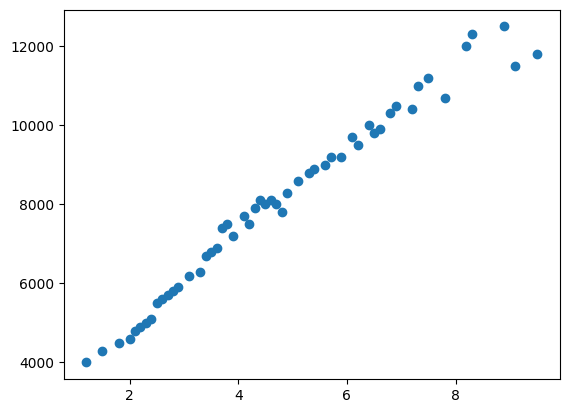

In [430]:
plt.scatter(X,Y)
plt.show()

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.metrics         import r2_score

ridge com o alpha igual ao 0 se torna uma regressão linear

In [432]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

X = StandardScaler().fit_transform(X.values.reshape(-1,1))
xtrain, xtest, ytrain, ytest = train_test_split(X,Y.values.reshape(-1,1),test_size=10,random_state=42)


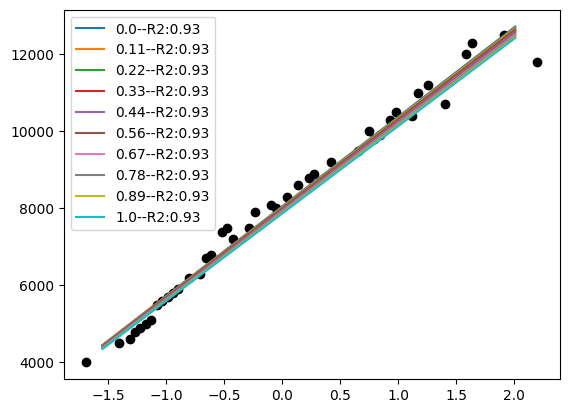

In [433]:
fig , ax = plt.subplots(1,1)
ax.scatter(xtrain[:,0],ytrain,c='black')
for i in np.linspace(0,1,10):
    ridge = RidgeRegressor(round(i,2),solver='normal')#
    ridge.fit(xtrain,ytrain)
    pred = ridge.predict(xtest)
    ax.plot(sorted(xtest[:,0]),sorted(pred),label=str(round(i,2))+"--R2:"+str(round(r2_score(ytest,pred),2)) )
    ax.legend()
plt.show()